In [21]:
#Installed required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#if 1, reads results1 (surface rendering)
#if 2, reads results2 (volume rendering)
flag = 1

In [23]:
# Read dataset
df = pd.read_csv(r"results" + str(flag) +".csv", header = None)
df


,0,1,2
0,2,10,415.633178
1,3,10,158.718386
2,5,10,84.455618
3,9,10,69.803480
4,2,20,1618.372608
5,3,20,499.104151
6,5,20,233.302674
7,9,20,223.190807
8,2,30,3427.001459
9,3,30,887.185578


In [24]:
# Fix formatting
df.columns = ['Processes','Viewpoints','Time']
df = df.sort_values(by='Processes')
df['Processes'] = df['Processes'] - 1
df['Processes'] = df['Processes'].astype(str)
df

,Processes,Viewpoints,Time
0,1,10,415.633178
4,1,20,1618.372608
8,1,30,3427.001459
1,2,10,158.718386
5,2,20,499.104151
9,2,30,887.185578
2,4,10,84.455618
6,4,20,233.302674
10,4,30,392.546137
3,8,10,69.803480


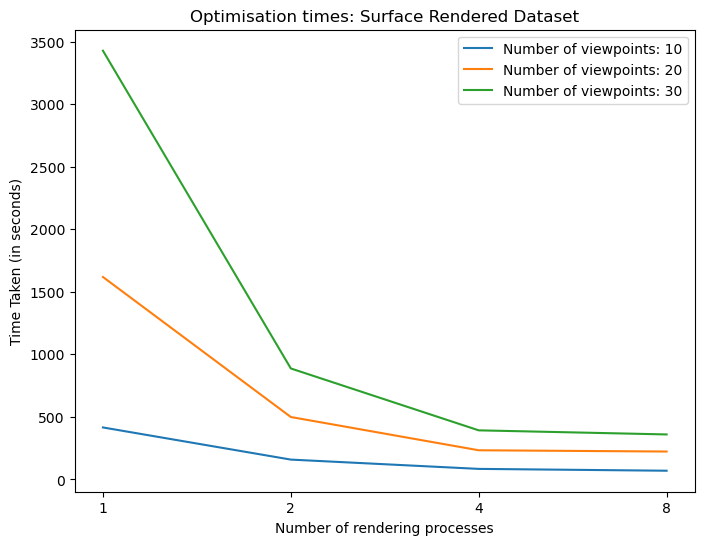

In [25]:
#Group by viewpoint count
splitdfs = df.groupby('Viewpoints')

# Create plots for each viewpoint count
plt.figure(figsize=(8, 6))
for viewc, minidf in splitdfs:
    plt.plot(minidf['Processes'], minidf['Time'], label=f'Number of viewpoints: {viewc}')

plt.xlabel('Number of rendering processes')
plt.ylabel('Time Taken (in seconds)')
if (flag == 1):
    plt.title("Optimisation times: Surface Rendered Dataset")
elif (flag == 2):
    plt.title("Optimisation times: Volume Rendered Dataset")
plt.legend()
plt.savefig('opt_times' + str(flag) + '.png')
plt.show()